**Denoising by AEs**

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
figsize = (15, 6)
plt.style.use('fivethirtyeight')

**Loading dataset**

In [2]:
img_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=img_transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=img_transform, download=True)
batch_size = 256
n_iters = 10000
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

Undercomplete

**Autoencoder architecture**

In [3]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 128), nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

**Evaluation**

In [4]:
learning_rate = 0.2
model = autoencoder()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28 * 28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        outputs = model.forward(noisy_images)
        loss = criterion(outputs, images)
        # ===================backward====================
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # ===================log========================
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        losstotal = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            losstotal += criterion(output, images)
    losstotal = losstotal / len(test_loader)
print('Loss Test: {}'.format(losstotal))

epoch [1/42], loss: 0.2235
epoch [2/42], loss: 0.1704
epoch [3/42], loss: 0.1594
epoch [4/42], loss: 0.1412
epoch [5/42], loss: 0.1380
epoch [6/42], loss: 0.1220
epoch [7/42], loss: 0.1199
epoch [8/42], loss: 0.1211
epoch [9/42], loss: 0.1001
epoch [10/42], loss: 0.1059
epoch [11/42], loss: 0.1083
epoch [12/42], loss: 0.1106
epoch [13/42], loss: 0.1040
epoch [14/42], loss: 0.0914
epoch [15/42], loss: 0.0961
epoch [16/42], loss: 0.0984
epoch [17/42], loss: 0.0885
epoch [18/42], loss: 0.0883
epoch [19/42], loss: 0.0890
epoch [20/42], loss: 0.0873
epoch [21/42], loss: 0.0896
epoch [22/42], loss: 0.0831
epoch [23/42], loss: 0.0849
epoch [24/42], loss: 0.0806
epoch [25/42], loss: 0.0847
epoch [26/42], loss: 0.0782
epoch [27/42], loss: 0.0832
epoch [28/42], loss: 0.0788
epoch [29/42], loss: 0.0728
epoch [30/42], loss: 0.0756
epoch [31/42], loss: 0.0706
epoch [32/42], loss: 0.0707
epoch [33/42], loss: 0.0681
epoch [34/42], loss: 0.0681
epoch [35/42], loss: 0.0745
epoch [36/42], loss: 0.0729
e

Overcomplete

**Autoencoder architecture**

In [5]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 1000), nn.Tanh())
        self.decoder = nn.Sequential(nn.Linear(1000, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

**Evaluation**

In [6]:
learning_rate = 0.2
model = autoencoder()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28 * 28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        outputs = model.forward(noisy_images)
        loss = criterion(outputs, images)
        # ===================backward====================
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # ===================log========================
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        losstotal = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            losstotal += criterion(output, images)
    losstotal = losstotal / len(test_loader)
print('Loss Test: {}'.format(losstotal))

epoch [1/42], loss: 0.1411
epoch [2/42], loss: 0.1012
epoch [3/42], loss: 0.0934
epoch [4/42], loss: 0.0897
epoch [5/42], loss: 0.0817
epoch [6/42], loss: 0.0728
epoch [7/42], loss: 0.0797
epoch [8/42], loss: 0.0743
epoch [9/42], loss: 0.0717
epoch [10/42], loss: 0.0706
epoch [11/42], loss: 0.0614
epoch [12/42], loss: 0.0653
epoch [13/42], loss: 0.0591
epoch [14/42], loss: 0.0595
epoch [15/42], loss: 0.0523
epoch [16/42], loss: 0.0546
epoch [17/42], loss: 0.0559
epoch [18/42], loss: 0.0484
epoch [19/42], loss: 0.0523
epoch [20/42], loss: 0.0518
epoch [21/42], loss: 0.0464
epoch [22/42], loss: 0.0461
epoch [23/42], loss: 0.0520
epoch [24/42], loss: 0.0470
epoch [25/42], loss: 0.0435
epoch [26/42], loss: 0.0458
epoch [27/42], loss: 0.0402
epoch [28/42], loss: 0.0450
epoch [29/42], loss: 0.0392
epoch [30/42], loss: 0.0435
epoch [31/42], loss: 0.0351
epoch [32/42], loss: 0.0420
epoch [33/42], loss: 0.0463
epoch [34/42], loss: 0.0393
epoch [35/42], loss: 0.0396
epoch [36/42], loss: 0.0413
e

The objective of undercomplete autoencoder is to capture the most important features present in the data. Undercomplete autoencoders have a smaller dimension for hidden layer compared to the input layer. This helps to obtain important features from the data. Undercomplete autoencoders do not need any regularization as they maximize the probability of data rather than copying the input to the output.

In contrast, if the hidden layers are larger than (overcomplete autoencoders), or equal to, the input layer, or the hidden units are given enough capacity, an autoencoder can potentially learn the identity function and become useless. However, experimental results have shown that autoencoders might still learn useful features in these cases. In the ideal setting, one should be able to tailor the code dimension and the model capacity on the basis of the complexity of the data distribution to be modeled. One way to do so, is to exploit the model variants known as Regularized Autoencoders.

As a result, overcomplete autoencoders normally have better performance rather than undercomplete autoencoders.

**Evaluation**

With L1 regularization

In [7]:
learning_rate = 0.2
C = 0.1
model = autoencoder()
criterion1 = nn.MSELoss()
criterion2 = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28 * 28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        outputs = model.forward(noisy_images)
        h = model.encoder(noisy_images)
        loss = criterion1(outputs, images) + C * criterion2(h, torch.zeros(h.shape))
        # ===================backward====================
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # ===================log========================
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        losstotal = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            losstotal += criterion(output, images)
    losstotal = losstotal / len(test_loader)
print('Loss Test: {}'.format(losstotal))

epoch [1/42], loss: 0.1705
epoch [2/42], loss: 0.1500
epoch [3/42], loss: 0.1344
epoch [4/42], loss: 0.1210
epoch [5/42], loss: 0.1206
epoch [6/42], loss: 0.1124
epoch [7/42], loss: 0.1059
epoch [8/42], loss: 0.1034
epoch [9/42], loss: 0.1006
epoch [10/42], loss: 0.0969
epoch [11/42], loss: 0.0980
epoch [12/42], loss: 0.0913
epoch [13/42], loss: 0.0874
epoch [14/42], loss: 0.0931
epoch [15/42], loss: 0.0860
epoch [16/42], loss: 0.0797
epoch [17/42], loss: 0.0754
epoch [18/42], loss: 0.0810
epoch [19/42], loss: 0.0775
epoch [20/42], loss: 0.0863
epoch [21/42], loss: 0.0821
epoch [22/42], loss: 0.0751
epoch [23/42], loss: 0.0754
epoch [24/42], loss: 0.0752
epoch [25/42], loss: 0.0703
epoch [26/42], loss: 0.0731
epoch [27/42], loss: 0.0693
epoch [28/42], loss: 0.0688
epoch [29/42], loss: 0.0714
epoch [30/42], loss: 0.0676
epoch [31/42], loss: 0.0694
epoch [32/42], loss: 0.0625
epoch [33/42], loss: 0.0632
epoch [34/42], loss: 0.0658
epoch [35/42], loss: 0.0655
epoch [36/42], loss: 0.0664
e

**Evaluation**

With L2 regularization

In [8]:
learning_rate = 0.2
C = 0.1
model = autoencoder()
criterion1 = nn.MSELoss()
criterion2 = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28 * 28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        outputs = model.forward(noisy_images)
        h = model.encoder(noisy_images)
        loss = criterion1(outputs, images) + C * criterion2(h, torch.zeros(h.shape))
        # ===================backward====================
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # ===================log========================
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        losstotal = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            losstotal += criterion(output, images)
    losstotal = losstotal / len(test_loader)
print('Loss Test: {}'.format(losstotal))

epoch [1/42], loss: 0.1591
epoch [2/42], loss: 0.1324
epoch [3/42], loss: 0.1226
epoch [4/42], loss: 0.1098
epoch [5/42], loss: 0.0959
epoch [6/42], loss: 0.0975
epoch [7/42], loss: 0.0948
epoch [8/42], loss: 0.0883
epoch [9/42], loss: 0.0797
epoch [10/42], loss: 0.0818
epoch [11/42], loss: 0.0796
epoch [12/42], loss: 0.0705
epoch [13/42], loss: 0.0734
epoch [14/42], loss: 0.0700
epoch [15/42], loss: 0.0752
epoch [16/42], loss: 0.0687
epoch [17/42], loss: 0.0725
epoch [18/42], loss: 0.0665
epoch [19/42], loss: 0.0615
epoch [20/42], loss: 0.0605
epoch [21/42], loss: 0.0596
epoch [22/42], loss: 0.0614
epoch [23/42], loss: 0.0545
epoch [24/42], loss: 0.0548
epoch [25/42], loss: 0.0576
epoch [26/42], loss: 0.0539
epoch [27/42], loss: 0.0545
epoch [28/42], loss: 0.0548
epoch [29/42], loss: 0.0524
epoch [30/42], loss: 0.0537
epoch [31/42], loss: 0.0498
epoch [32/42], loss: 0.0447
epoch [33/42], loss: 0.0543
epoch [34/42], loss: 0.0498
epoch [35/42], loss: 0.0499
epoch [36/42], loss: 0.0492
e

With dropout regularization

**Autoencoder architecture**

In [9]:
class autoencoder(nn.Module):
    def __init__(self, dp):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 1000), nn.Tanh())
        self.decoder = nn.Sequential(nn.Dropout(p=dp), nn.Linear(1000, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

**Evaluation**

In [10]:
dp = 0.4
learning_rate = 0.2
model = autoencoder(dp)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        images = img.view(-1, 28 * 28).requires_grad_()
        noisy_images = images + 0.1 * torch.randn(images.shape)
        # ===================forward=====================
        outputs = model.forward(noisy_images)
        loss = criterion(outputs, images)
        # ===================backward====================
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # ===================log========================
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        losstotal = 0
        for data in test_loader:
            img, _ = data
            images = img.view(-1, 28 * 28).requires_grad_()
            noisy_images = images + 0.1 * torch.randn(images.shape)
            output = model.forward(noisy_images)
            losstotal += criterion(output, images)
    losstotal = losstotal / len(test_loader)
print('Loss Test: {}'.format(losstotal))

epoch [1/42], loss: 0.1603
epoch [2/42], loss: 0.1261
epoch [3/42], loss: 0.1104
epoch [4/42], loss: 0.1047
epoch [5/42], loss: 0.0902
epoch [6/42], loss: 0.0923
epoch [7/42], loss: 0.0910
epoch [8/42], loss: 0.0793
epoch [9/42], loss: 0.0844
epoch [10/42], loss: 0.0774
epoch [11/42], loss: 0.0748
epoch [12/42], loss: 0.0795
epoch [13/42], loss: 0.0688
epoch [14/42], loss: 0.0686
epoch [15/42], loss: 0.0631
epoch [16/42], loss: 0.0711
epoch [17/42], loss: 0.0709
epoch [18/42], loss: 0.0648
epoch [19/42], loss: 0.0609
epoch [20/42], loss: 0.0596
epoch [21/42], loss: 0.0624
epoch [22/42], loss: 0.0570
epoch [23/42], loss: 0.0578
epoch [24/42], loss: 0.0568
epoch [25/42], loss: 0.0508
epoch [26/42], loss: 0.0556
epoch [27/42], loss: 0.0555
epoch [28/42], loss: 0.0560
epoch [29/42], loss: 0.0528
epoch [30/42], loss: 0.0482
epoch [31/42], loss: 0.0537
epoch [32/42], loss: 0.0475
epoch [33/42], loss: 0.0508
epoch [34/42], loss: 0.0486
epoch [35/42], loss: 0.0470
epoch [36/42], loss: 0.0489
e

Various techniques exist to prevent autoencoders from learning the identity function and to improve their ability to capture important information and learn richer representations.

Recently, it has been observed that when representations are learnt in a way that encourages sparsity, improved performance is obtained on classification tasks. Sparse autoencoder may include more (rather than fewer) hidden units than inputs, but only a small number of the hidden units are allowed to be active at once. This sparsity constraint forces the model to respond to the unique statistical features of the input data used for training. Specifically, a sparse autoencoder is an autoencoder whose training criterion involves a sparsity penalty $\Omega(h)$ on the code layer $h$.

One of the methods to achieve sparsity in the activation of the hidden unit, is by applying L1 or L2 regularization terms on the activation, scaled by a certain parameter $\lambda$. Dropout can also be used in this regard.

Based on the result, L1 and L2 regularization are better than dropout method and can improve overcomplete autoencoder model on test data.

NOTE: add your explanation after each part 

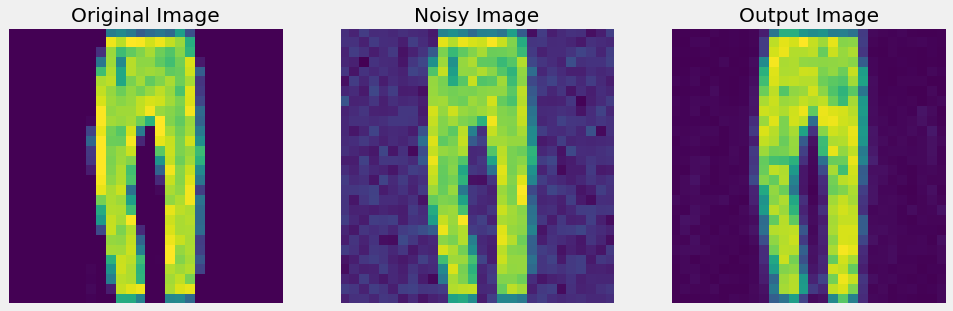

In [11]:
images = train_dataset.data / 128 - 1
perm = torch.randperm(len(images))
original_img = images[perm][0].view(-1, 28 * 28).requires_grad_()
noisy_img = original_img + 0.1 * torch.randn(original_img.shape)
output_img = model.forward(noisy_img)
original_img = original_img.reshape(28, 28)
noisy_img = noisy_img.reshape(28, 28)
output_img = output_img.reshape(28, 28)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(131, xticks=[], yticks=[])
ax.imshow(original_img.detach())
ax.set_title('Original Image')
ax = fig.add_subplot(132, xticks=[], yticks=[])
ax.imshow(noisy_img.detach())
ax.set_title('Noisy Image')
ax = fig.add_subplot(133, xticks=[], yticks=[])
ax.imshow(output_img.detach())
ax.set_title('Output Image')
plt.show()